In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def cross_entropy(Y_true, predictions):
  filter_true_1 = Y_true == 1
  return -1 * ( np.sum(np.log(predictions[filter_true_1])) + np.sum(np.log(1 - predictions[~filter_true_1])) )

In [ ]:
def gradient_descent_step(df, x, step_size):
  return x - step_size * df(x)

def gradient_descent(f, df, x0, step_size, numer_of_steps, treshold=None, should_trace_steps=None, should_plot=False):
  x = x0
  
  if (should_trace_steps is not None):
    print(f'Step 0. Starting point is {x0} and initial function value is {f(x0)}')
  
  if (should_plot):
    steps_hist = [0]
    f_hist = [f(x0)]

  for step in range(numer_of_steps):
    x_new = gradient_descent_step(df, x, step_size)
    f_new = f(x_new)
    if (should_trace_steps is not None):
      if ((step+1) % should_trace_steps == 0):
        print(f'Step {step+1}. At {x_new} function value is {f_new}')
    
    if (should_plot):
      steps_hist.append(step+1)
      f_hist.append(f_new)
    
    if (treshold is not None):
      change = np.abs(f_new - f(x))
      if (change < treshold):
        print(f'Early stop after {step+1} steps because change in step {change} is smaller than treshold {treshold}')
        x = x_new 
        break
   
    x = x_new 


  if (should_trace_steps is not None):
    print(f'Loop finished with trained parameters at {x} and function value is {f(x)}')
  
  if (should_plot):
    plt.figure(figsize=(20,10))
    plt.plot(steps_hist, f_hist);
    plt.title('Cost fuction history');

  return x

In [ ]:
N = 4
D = 2

X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
XY = X[:,0] * X[:,1]
print(type(XY))

Y = np.array([0, 1, 1, 0])

Xb = np.hstack([np.ones((N,1)), XY.reshape(-1,1), X])
Xb

<class 'numpy.ndarray'>


array([[1., 0., 0., 0.],
       [1., 0., 0., 1.],
       [1., 0., 1., 0.],
       [1., 1., 1., 1.]])

In [ ]:
w0 = np.random.randn(D + 2)

# No regularization

Initial value for trained weigths: [-0.49984832  1.43380071 -0.61412204  0.46244476]
Step 0. Starting point is [-0.49984832  1.43380071 -0.61412204  0.46244476] and initial function value is 3.7428976764868587
Step 1000. At [-0.03153393 -2.43932186  0.61713587  0.71436177] function value is 1.8066849967704983
Step 2000. At [-0.50480735 -4.39075989  1.61759113  1.6300235 ] function value is 1.2135244507903584
Step 3000. At [-0.90493606 -5.79580745  2.36669112  2.36899468] function value is 0.8874545689308272
Step 4000. At [-1.21356792 -6.89491073  2.94690443  2.94747446] function value is 0.6891757697320385
Step 5000. At [-1.45942843 -7.79064848  3.41453271  3.41470832] function value is 0.5588097119657844
Step 6000. At [-1.66218211 -8.54232001  3.80375684  3.80382074] function value is 0.46770659499294925
Step 7000. At [-1.83403337 -9.18750953  4.13589759  4.13592404] function value is 0.40095327128465613
Step 8000. At [-1.9828155  -9.75129939  4.42489417  4.42490629] function value is

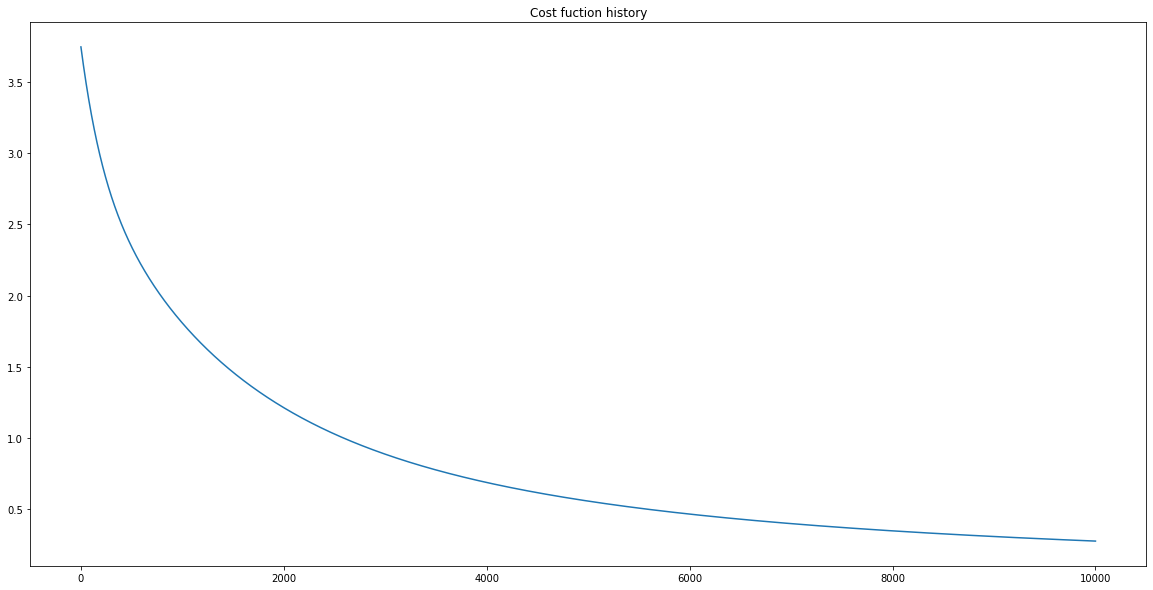

In [ ]:
alfa = 0.0

cost = lambda  w: cross_entropy(Y, sigmoid(Xb.dot(w)))  
dcost = lambda  w: -1 * Xb.T.dot(Y - sigmoid(Xb.dot(w)))

print('Initial value for trained weigths:', w0)
w_gd = gradient_descent(cost, dcost, x0=w0.copy(), step_size=0.01, numer_of_steps=10000, treshold=None, should_trace_steps=1000, should_plot=True)

z_gd = Xb.dot(w_gd)
y_pred_gd = sigmoid(z_gd)
L_gd = cross_entropy(Y, y_pred_gd)
print('Final W weights calculated by gradient descent:', w_gd)
print('Cross Enthropy loss for W weights calculated bu gradient descent:', L_gd)

print(y_pred_gd)

# L2 Regularization

Initial value for trained weigths: [-0.49984832  1.43380071 -0.61412204  0.46244476]
Step 0. Starting point is [-0.49984832  1.43380071 -0.61412204  0.46244476] and initial function value is 0.9386210529936522
Step 1000. At [-0.64261488 -4.77592835  1.85185316  1.85572738] function value is 0.307622811530744
Step 2000. At [-1.20524794 -6.72349384  2.89478193  2.89485404] function value is 0.24146927122965728
Step 3000. At [-1.46532389 -7.65156766  3.38441361  3.38441652] function value is 0.22683632114881006
Step 4000. At [-1.59846525 -8.1324213   3.63673359  3.63673375] function value is 0.22294996977599935
Step 5000. At [-1.66997007 -8.39180905  3.77258176  3.77258177] function value is 0.22182418050743016
Step 6000. At [-1.70928699 -8.53468517  3.84735425  3.84735425] function value is 0.2214833264312
Step 7000. At [-1.73117178 -8.61427428  3.88899342  3.88899342] function value is 0.221377667913281
Step 8000. At [-1.74343398 -8.6588844   3.9123292   3.9123292 ] function value is 0.

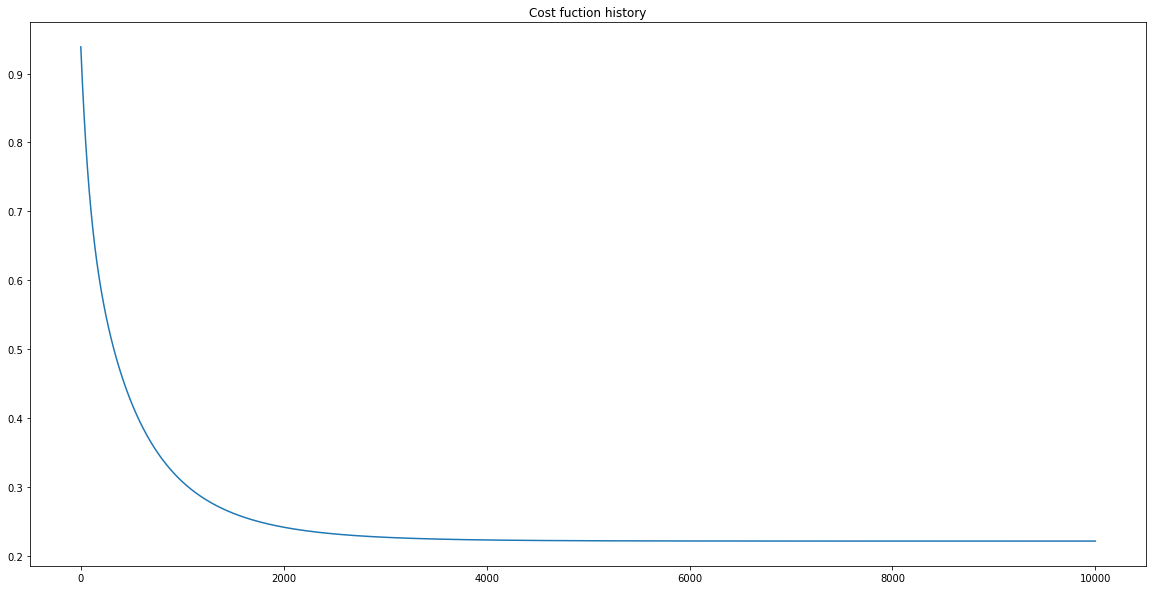

In [ ]:
alfa = 0.001

cost = lambda  w: cross_entropy(Y, sigmoid(Xb.dot(w))) / len(Y) + alfa * w.dot(w)
dcost = lambda  w: -1 * Xb.T.dot(Y - sigmoid(Xb.dot(w))) / len(Y) + 2*alfa * w

print('Initial value for trained weigths:', w0)
w_gd = gradient_descent(cost, dcost, x0=w0.copy(), step_size=0.1, numer_of_steps=10000, treshold=None, should_trace_steps=1000, should_plot=True)

z_gd = Xb.dot(w_gd)
y_pred_gd = sigmoid(z_gd)
L_gd = cross_entropy(Y, y_pred_gd)
print('Final W weights calculated by gradient descent:', w_gd)
print('Cross Enthropy loss for W weights calculated bu gradient descent:', L_gd)

print(y_pred_gd==Y)

# L1 Regularization

Initial value for trained weigths: [-0.49984832  1.43380071 -0.61412204  0.46244476]
Step 0. Starting point is [-0.49984832  1.43380071 -0.61412204  0.46244476] and initial function value is 0.9387346349616371
Step 1000. At [-0.68391037 -5.0682159   1.96769585  1.97235041] function value is 0.271648455151629
Step 2000. At [-1.40026698 -7.6457606   3.32135057  3.32150027] function value is 0.16075264304725836
Step 3000. At [-1.82876115 -9.26923554  4.15324083  4.15325478] function value is 0.11819135589920586
Step 4000. At [ -2.12570186 -10.42812368   4.73899953   4.73900185] function value is 0.09686369904190201
Step 5000. At [ -2.34926881 -11.31775819   5.18464347   5.18464402] function value is 0.08441925813282504
Step 6000. At [ -2.52643702 -12.03331612   5.54062107   5.54062123] function value is 0.07642446478878477
Step 7000. At [ -2.67177618 -12.62768269   5.83459376   5.83459382] function value is 0.07093868815484143
Step 8000. At [ -2.79400634 -13.13308601   6.08327754   6.0832

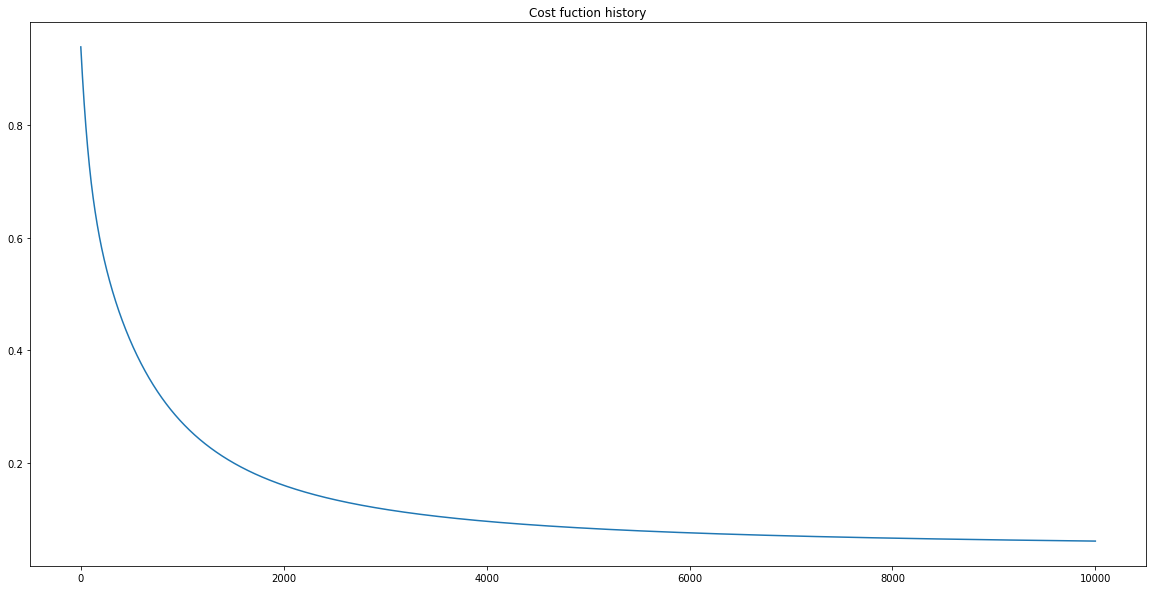

In [ ]:
alfa = 0.001

cost = lambda  w: cross_entropy(Y, sigmoid(Xb.dot(w))) / len(Y) + alfa * (np.abs(w)).sum()
dcost = lambda  w: -1 * Xb.T.dot(Y - sigmoid(Xb.dot(w))) / len(Y) + alfa * np.sign(w)

print('Initial value for trained weigths:', w0)
w_gd = gradient_descent(cost, dcost, x0=w0.copy(), step_size=0.1, numer_of_steps=10000, treshold=None, should_trace_steps=1000, should_plot=True)

z_gd = Xb.dot(w_gd)
y_pred_gd = sigmoid(z_gd)
L_gd = cross_entropy(Y, y_pred_gd)
print('Final W weights calculated by gradient descent:', w_gd)
print('Cross Enthropy loss for W weights calculated by gradient descent:', L_gd)
plt.show()